# Aneleise Peppard

## Research question/interests

The research question that I am interested in is whether the population size of the district in which a school is located has a relationship with the proportion of students receiving their high school diploma.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Conduct an Exploratory Data Analysis (EDA) on your dataset

Disclaimer:
In order to conduct an EDA relevant to my research question, I first need to merge in a population dataset. You will see that I do this in Task 2, which is where I continue my EDA.

In [140]:
myData = pd.read_csv("../data/raw/Completion_Rate_residents_only_97-21.csv")
myData

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185,35.196,100
55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20,3.312,96.677
55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165,31.884,100
55594,2020/2021,DISTRICT LEVEL,SPECIAL NEEDS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41,6.97,100


This is my raw data.

In [141]:
myData.shape

(55596, 13)

This shows the number of rows and columns in my dataset.

In [142]:
myData.head()

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244


This shows the column names and the first four rows of my dataset. 

In [143]:
myData.describe().T

,count,mean,std,min,25%,50%,75%,max
DISTRICT_NUMBER,52941.0,52.947904,22.915634,5.0,37.0,52.0,71.0,93.0


This is not important because generating min, max, mean, etc. data on the 'District Number' column is not informative to my research question.

In [144]:
list(myData.columns)

['YEAR_6_OF_COHORT',
 'DATA_LEVEL',
 'SUB_POPULATION',
 'PUBLIC_OR_INDEPENDENT',
 'DISTRICT_NUMBER',
 'DISTRICT_NAME',
 'FACILITY_TYPE',
 'COMPLETION_RATE_MODEL',
 'MODEL_TYPE',
 'COHORT_COUNT',
 'SUCCESS_COUNT',
 'ESTIMATED_OUTMIGRANTS',
 'ESTIMATED_COMPLETION_RATE']

This shows all of the column names. I will use this to determine which rows I need for my research question and which ones I can drop. 

In [145]:
myData.nunique()

YEAR_6_OF_COHORT                24
DATA_LEVEL                       2
SUB_POPULATION                   5
PUBLIC_OR_INDEPENDENT            3
DISTRICT_NUMBER                 60
DISTRICT_NAME                   60
FACILITY_TYPE                    1
COMPLETION_RATE_MODEL            8
MODEL_TYPE                       2
COHORT_COUNT                  4908
SUCCESS_COUNT                 4928
ESTIMATED_OUTMIGRANTS        34589
ESTIMATED_COMPLETION_RATE    27168
dtype: int64

This is helpful to see how many unique values are under each of the columns. 

Below, I will explore all of the unique values in each of the columns. I will use this information later to determine which columns and rows I can drop.

In [146]:
myData["YEAR_6_OF_COHORT"].unique()

array(['1997/1998', '1998/1999', '1999/2000', '2000/2001', '2001/2002',
       '2002/2003', '2003/2004', '2004/2005', '2005/2006', '2006/2007',
       '2007/2008', '2008/2009', '2009/2010', '2010/2011', '2011/2012',
       '2012/2013', '2013/2014', '2014/2015', '2015/2016', '2016/2017',
       '2017/2018', '2018/2019', '2019/2020', '2020/2021'], dtype=object)

This shows that the data ranges from school years 1997/1998 to 2020/2021.

In [147]:
myData["DATA_LEVEL"].unique()

array(['PROVINCE LEVEL', 'DISTRICT LEVEL'], dtype=object)

I will only be using the 'District Level' column in my research.

In [148]:
myData["SUB_POPULATION"].unique()

array(['ALL STUDENTS', 'INDIGENOUS', 'NON INDIGENOUS', 'SPECIAL NEEDS',
       'NON SPECIAL NEEDS'], dtype=object)

I am not researching sub population, so I will only need data for 'All Students'.

In [149]:
myData["PUBLIC_OR_INDEPENDENT"].unique()

array(['PROVINCE-TOTAL', 'BC PUBLIC SCHOOL', 'BC INDEPENDENT SCHOOL'],
      dtype=object)

In [150]:
myData["DISTRICT_NUMBER"].unique()

array([nan,  5.,  6.,  8., 10., 19., 20., 22., 23., 27., 28., 33., 34.,
       35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 57., 58., 59., 60., 61., 62.,
       63., 64., 67., 68., 69., 70., 71., 72., 73., 74., 75., 78., 79.,
       81., 82., 83., 84., 85., 87., 91., 92., 93.])

I will not be using the school district numbers to conduct my research because I think using the district names is more useful for users of my research.

In [151]:
myData["DISTRICT_NAME"].unique()

array([nan, 'Southeast Kootenay', 'Rocky Mountain', 'Kootenay Lake',
       'Arrow Lakes', 'Revelstoke', 'Kootenay-Columbia', 'Vernon',
       'Central Okanagan', 'Cariboo-Chilcotin', 'Quesnel', 'Chilliwack',
       'Abbotsford', 'Langley', 'Surrey', 'Delta', 'Richmond',
       'Vancouver', 'New Westminster', 'Burnaby',
       'Maple Ridge-Pitt Meadows', 'Coquitlam', 'North Vancouver',
       'West Vancouver', 'Sunshine Coast', 'Powell River', 'Sea to Sky',
       'Central Coast', 'Haida Gwaii', 'Boundary', 'Prince Rupert',
       'Okanagan Similkameen', 'Bulkley Valley', 'Prince George',
       'Nicola-Similkameen', 'Peace River South', 'Peace River North',
       'Greater Victoria', 'Sooke', 'Saanich', 'Gulf Islands',
       'Okanagan Skaha', 'Nanaimo-Ladysmith', 'Qualicum', 'Pacific Rim',
       'Comox Valley', 'Campbell River', 'Kamloops-Thompson',
       'Gold Trail', 'Mission', 'Fraser-Cascade', 'Cowichan Valley',
       'Fort Nelson', 'Coast Mountains', 'North Okanagan-Shuswap',

In [152]:
myData["FACILITY_TYPE"].unique()

array(['ALL FACILITY TYPES'], dtype=object)

In [153]:
myData["COMPLETION_RATE_MODEL"].unique()

array(['GRAD_7_YEAR EXTENDED_MODEL', 'GRAD_8_YEAR EXTENDED_MODEL',
       'SIX YEAR DOGWOOD COMPLETION RATE', 'PROG_2_YEAR SUB_MODEL',
       'PROG_3_YEAR SUB_MODEL', 'PROG_4_YEAR SUB_MODEL',
       'PROG_5_YEAR SUB_MODEL', 'GRAD_5_YEAR SUB_MODEL'], dtype=object)

I will only be looking at students who received their Dogwood Diploma, so only the 'Six Year Dogwood Completion Rate' column will be useful for me.

In [154]:
myData["MODEL_TYPE"].unique()

array(['DYNAMIC MODEL', 'STATIC MODEL'], dtype=object)

In [155]:
myData["COHORT_COUNT"].unique()

array(['50298', '3725', '46573', ..., '1935', '2618', '2481'],
      dtype=object)

In [156]:
myData["SUCCESS_COUNT"].unique()

array(['34014', '1284', '32730', ..., '3293', '2214', '2130'],
      dtype=object)

In [157]:
myData["ESTIMATED_OUTMIGRANTS"].unique()

array(['5157.609', '451.518', '4706.091', ..., '23.211', '35.196',
       '28.226'], dtype=object)

In [158]:
myData["ESTIMATED_COMPLETION_RATE"].unique()

array(['75.352', '39.224', '78.176', ..., '66.552', '45.087', '57.434'],
      dtype=object)

This column is essential to my research question. 

### Task 2. Set up an “Analysis Pipeline”

Below, I will remove all the columns to my research question. These include: 
'PUBLIC_OR_INDEPENDENT', 
'DISTRICT_NUMBER', 
'FACILITY_TYPE', 
'MODEL_TYPE', 
'COHORT_COUNT', 
'SUCCESS_COUNT', and
'ESTIMATED_OUTMIGRANTS'

In [159]:
myData = myData.drop("PUBLIC_OR_INDEPENDENT", axis = 1)
myData = myData.drop("DISTRICT_NUMBER", axis = 1)
myData = myData.drop("FACILITY_TYPE", axis = 1)
myData = myData.drop("MODEL_TYPE", axis = 1)
myData = myData.drop("COHORT_COUNT", axis = 1)
myData = myData.drop("SUCCESS_COUNT", axis = 1)
myData = myData.drop("ESTIMATED_OUTMIGRANTS", axis = 1)
myData


,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,DISTRICT_NAME,COMPLETION_RATE_MODEL,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,NaN,GRAD_7_YEAR EXTENDED_MODEL,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,NaN,GRAD_7_YEAR EXTENDED_MODEL,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,NaN,GRAD_7_YEAR EXTENDED_MODEL,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,NaN,GRAD_7_YEAR EXTENDED_MODEL,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,NaN,GRAD_7_YEAR EXTENDED_MODEL,76.244
...,...,...,...,...,...,...
55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,100
55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,96.677
55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,100
55594,2020/2021,DISTRICT LEVEL,SPECIAL NEEDS,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,100


Below, I will remove rows that are not relevant to my research question including:
rows with anything except for "DISTRICT LEVEL" in the "DATA_LEVEL" column,
rows with anything except for "ALL STUDENTS" in the "SUB_POPULATION" column,
rows with "NaN" data in the "DISTRICT_NAME" column, and
rows with anything except for "SIX YEAR DOGWOOD COMPLETION RATE" in the "COMPLETION_RATE_MODEL" column

In [160]:
myData = myData[myData['DATA_LEVEL'].str.contains('DISTRICT LEVEL')==True]
myData = myData[myData['SUB_POPULATION'].str.contains('ALL STUDENTS')==True]
myData = myData.dropna(axis=0)
myData = myData[myData['COMPLETION_RATE_MODEL'].str.contains('SIX YEAR DOGWOOD COMPLETION RATE')==True]
myData = myData[myData['ESTIMATED_COMPLETION_RATE'].str.contains('Msk')==False]
myData

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,DISTRICT_NAME,COMPLETION_RATE_MODEL,ESTIMATED_COMPLETION_RATE
1255,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Southeast Kootenay,SIX YEAR DOGWOOD COMPLETION RATE,85.704
1260,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Rocky Mountain,SIX YEAR DOGWOOD COMPLETION RATE,74.781
1265,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Kootenay Lake,SIX YEAR DOGWOOD COMPLETION RATE,79.971
1270,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Arrow Lakes,SIX YEAR DOGWOOD COMPLETION RATE,77.344
1275,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Revelstoke,SIX YEAR DOGWOOD COMPLETION RATE,75.764
...,...,...,...,...,...,...
53997,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Vancouver Island West,SIX YEAR DOGWOOD COMPLETION RATE,57.807
54002,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Vancouver Island North,SIX YEAR DOGWOOD COMPLETION RATE,68.604
54012,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Nechako Lakes,SIX YEAR DOGWOOD COMPLETION RATE,71.731
54017,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Nisga'a,SIX YEAR DOGWOOD COMPLETION RATE,62.228


Below, I will sort the "DISTRICT_NAME" column by alphabetical order.

In [161]:
myData = myData.sort_values(by=['DISTRICT_NAME'], ascending=True)
myData

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,DISTRICT_NAME,COMPLETION_RATE_MODEL,ESTIMATED_COMPLETION_RATE
34018,2012/2013,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,92.738
46572,2017/2018,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,90.305
13894,2004/2005,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,81.531
3823,2000/2001,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,77.97
44064,2016/2017,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,89.834
...,...,...,...,...,...,...
3878,2000/2001,DISTRICT LEVEL,ALL STUDENTS,West Vancouver,SIX YEAR DOGWOOD COMPLETION RATE,95.632
53837,2020/2021,DISTRICT LEVEL,ALL STUDENTS,West Vancouver,SIX YEAR DOGWOOD COMPLETION RATE,100
36583,2013/2014,DISTRICT LEVEL,ALL STUDENTS,West Vancouver,SIX YEAR DOGWOOD COMPLETION RATE,100
39095,2014/2015,DISTRICT LEVEL,ALL STUDENTS,West Vancouver,SIX YEAR DOGWOOD COMPLETION RATE,100


In [162]:
if len(myData[myData.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(myData[myData.duplicated()]))
    print(myData[myData.duplicated(keep=False)].sort_values(by=list(myData.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [163]:
myData = myData.rename(columns = {"DISTRICT_NAME" : "School District"})
myData = myData.rename(columns =  {"YEAR_6_OF_COHORT" : "Year"})
myData = myData.rename(columns =  {"ESTIMATED_COMPLETION_RATE" : "Estimated Completion Rate"})
myData = myData.drop("DATA_LEVEL", axis = 1)
myData = myData.drop("SUB_POPULATION", axis = 1)
myData = myData.drop("COMPLETION_RATE_MODEL", axis = 1)
myData

,Year,School District,Estimated Completion Rate
34018,2012/2013,Abbotsford,92.738
46572,2017/2018,Abbotsford,90.305
13894,2004/2005,Abbotsford,81.531
3823,2000/2001,Abbotsford,77.97
44064,2016/2017,Abbotsford,89.834
...,...,...,...
3878,2000/2001,West Vancouver,95.632
53837,2020/2021,West Vancouver,100
36583,2013/2014,West Vancouver,100
39095,2014/2015,West Vancouver,100


In [164]:
myData["Year"] = myData["Year"].str.slice(0,-5)
myData

,Year,School District,Estimated Completion Rate
34018,2012,Abbotsford,92.738
46572,2017,Abbotsford,90.305
13894,2004,Abbotsford,81.531
3823,2000,Abbotsford,77.97
44064,2016,Abbotsford,89.834
...,...,...,...
3878,2000,West Vancouver,95.632
53837,2020,West Vancouver,100
36583,2013,West Vancouver,100
39095,2014,West Vancouver,100


#### Merge in Population Dataset

In order to compare the districts, I will merge in another dataset from the government of BC that shows the population of all school districts available. 

In [165]:
popData = pd.read_csv("../data/raw/Population.csv")
popData

,Region,School District,Year,Gender,Total
0,5,Southeast Kootenay,1997,T,40656
1,6,Rocky Mountain,1997,T,24963
2,8,Kootenay Lake,1997,T,41417
3,10,Arrow Lakes,1997,T,5243
4,19,Revelstoke,1997,T,8830
...,...,...,...,...,...
1470,84,Vancouver Island West,2021,T,2327
1471,85,Vancouver Island North,2021,T,11799
1472,87,Stikine,2021,T,2094
1473,91,Nechako Lakes,2021,T,23460


In [166]:
popData = popData.drop("Region", axis = 1)
popData = popData.drop("Gender", axis = 1)
popData = popData.rename(columns = {"Total" : "Population"})
popData = popData.dropna(axis=0)
popData

,School District,Year,Population
0,Southeast Kootenay,1997,40656
1,Rocky Mountain,1997,24963
2,Kootenay Lake,1997,41417
3,Arrow Lakes,1997,5243
4,Revelstoke,1997,8830
...,...,...,...
1470,Vancouver Island West,2021,2327
1471,Vancouver Island North,2021,11799
1472,Stikine,2021,2094
1473,Nechako Lakes,2021,23460


In [167]:
myData["Year"] = myData["Year"].astype(int)
mypopData = pd.merge(myData, popData, how = "inner")
mypopData

,Year,School District,Estimated Completion Rate,Population
0,2012,Abbotsford,92.738,139733
1,2017,Abbotsford,90.305,151675
2,2004,Abbotsford,81.531,128808
3,2000,Abbotsford,77.97,120655
4,2016,Abbotsford,89.834,147982
...,...,...,...,...
1093,2000,West Vancouver,95.632,50101
1094,2020,West Vancouver,100,52489
1095,2013,West Vancouver,100,51652
1096,2014,West Vancouver,100,52310


In [168]:
mypopData = mypopData.sort_values(by=['Population'], ascending=False)
mypopData["Population"] = mypopData["Population"].astype(int)
mypopData["Estimated Completion Rate"] = mypopData["Estimated Completion Rate"].astype(float)
mypopData

,Year,School District,Estimated Completion Rate,Population
992,2020,Vancouver,91.024,716827
1010,2019,Vancouver,90.990,711708
1001,2018,Vancouver,91.839,697376
1008,2017,Vancouver,91.511,688495
995,2016,Vancouver,89.906,679567
...,...,...,...,...
568,2008,Nisga'a,61.777,1928
562,2020,Nisga'a,62.228,1917
559,2018,Nisga'a,56.090,1892
557,2011,Nisga'a,34.912,1891


In [169]:
cleanData = mypopData
cleanData

,Year,School District,Estimated Completion Rate,Population
992,2020,Vancouver,91.024,716827
1010,2019,Vancouver,90.990,711708
1001,2018,Vancouver,91.839,697376
1008,2017,Vancouver,91.511,688495
995,2016,Vancouver,89.906,679567
...,...,...,...,...
568,2008,Nisga'a,61.777,1928
562,2020,Nisga'a,62.228,1917
559,2018,Nisga'a,56.090,1892
557,2011,Nisga'a,34.912,1891


In [170]:
cleanData = cleanData.groupby('School District').mean()
cleanData = cleanData.sort_values(by=['Population'], ascending=False)
cleanData = cleanData.drop("Year", axis = 1)
cleanData["Population"] = cleanData["Population"].astype(int)
cleanData["Estimated Completion Rate"] = cleanData["Estimated Completion Rate"].astype(int)
cleanData

,Estimated Completion Rate,Population
School District,,
Vancouver,84,635383
Surrey,85,483813
Burnaby,86,225039
Greater Victoria,80,223584
Coquitlam,90,222578
Richmond,92,192277
Central Okanagan,84,181213
North Vancouver,88,139308
Abbotsford,86,137431


This is the data I will use for my research question.

### EDA Continued: Visualizations

### Figure 1:

<AxesSubplot:xlabel='Estimated Completion Rate', ylabel='Population'>

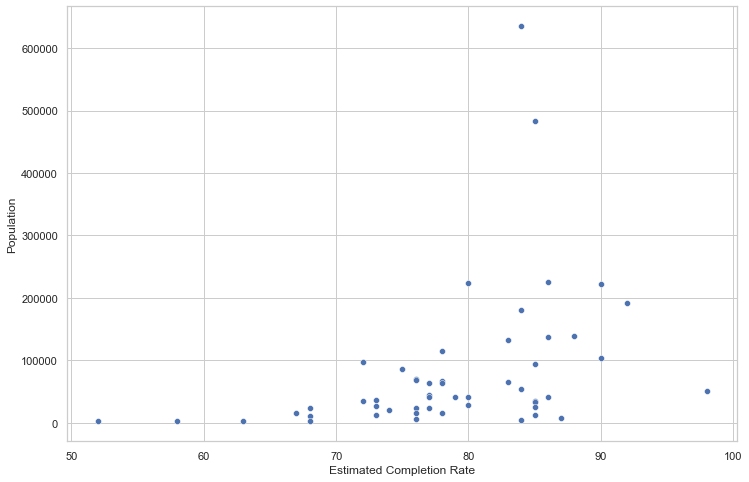

In [171]:
plt.figure(figsize = (12,8))
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'Estimated Completion Rate', y = 'Population', data = cleanData)

Figure 1: This graph plots a point for each school district's population (y-axis) and its corresponding estimated completion rate. From this visualization, I can see that on average there are increased completion rates as population increases, with the exception of some outliers.  

### Figure 2: 

[Text(0, 0, '52'),
 Text(1, 0, '58'),
 Text(2, 0, '63'),
 Text(3, 0, '67'),
 Text(4, 0, '68'),
 Text(5, 0, '72'),
 Text(6, 0, '73'),
 Text(7, 0, '74'),
 Text(8, 0, '75'),
 Text(9, 0, '76'),
 Text(10, 0, '77'),
 Text(11, 0, '78'),
 Text(12, 0, '79'),
 Text(13, 0, '80'),
 Text(14, 0, '83'),
 Text(15, 0, '84'),
 Text(16, 0, '85'),
 Text(17, 0, '86'),
 Text(18, 0, '87'),
 Text(19, 0, '88'),
 Text(20, 0, '90'),
 Text(21, 0, '92'),
 Text(22, 0, '98')]

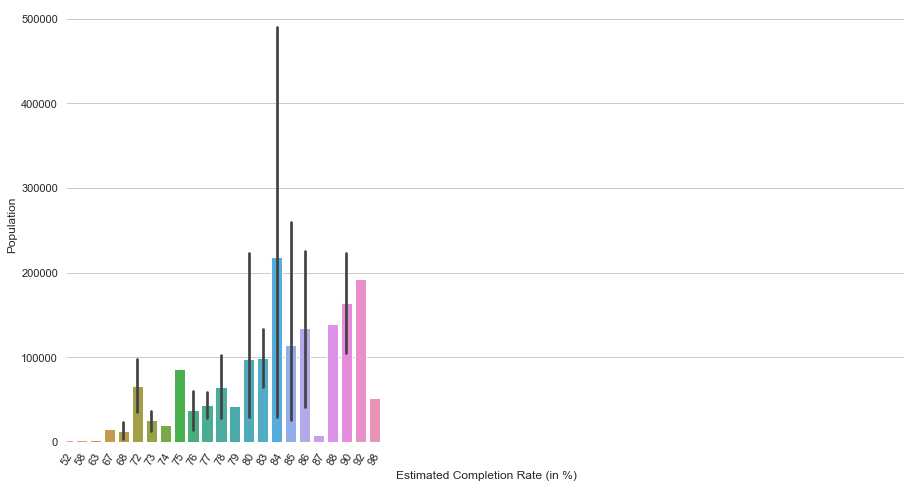

In [172]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(data=cleanData, x="Estimated Completion Rate", y = "Population")
ax.set(xlim=(0, 60), ylim=(0), ylabel="Population",
       xlabel="Estimated Completion Rate (in %)")
sns.despine(left=True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

Figure 2: This plots a bar that corresponds to the population of the school districts as the estimated completion rates increase. As seen in the graph, small population doesn't always mean a low completion rate. 

### Figure 3:

[Text(0, 0, '1937'),
 Text(1, 0, '2162'),
 Text(2, 0, '2410'),
 Text(3, 0, '3487'),
 Text(4, 0, '4726'),
 Text(5, 0, '5824'),
 Text(6, 0, '8206'),
 Text(7, 0, '11469'),
 Text(8, 0, '12212'),
 Text(9, 0, '12357'),
 Text(10, 0, '14992'),
 Text(11, 0, '15370'),
 Text(12, 0, '15882'),
 Text(13, 0, '19852'),
 Text(14, 0, '23770'),
 Text(15, 0, '24003'),
 Text(16, 0, '24201'),
 Text(17, 0, '25177'),
 Text(18, 0, '27009'),
 Text(19, 0, '28803'),
 Text(20, 0, '33257'),
 Text(21, 0, '34739'),
 Text(22, 0, '35346'),
 Text(23, 0, '36765'),
 Text(24, 0, '41004'),
 Text(25, 0, '41219'),
 Text(26, 0, '41562'),
 Text(27, 0, '41861'),
 Text(28, 0, '44668'),
 Text(29, 0, '51268'),
 Text(30, 0, '53549'),
 Text(31, 0, '63690'),
 Text(32, 0, '63949'),
 Text(33, 0, '64583'),
 Text(34, 0, '66625'),
 Text(35, 0, '69112'),
 Text(36, 0, '69607'),
 Text(37, 0, '86489'),
 Text(38, 0, '94526'),
 Text(39, 0, '97473'),
 Text(40, 0, '104409'),
 Text(41, 0, '115029'),
 Text(42, 0, '133282'),
 Text(43, 0, '137431'),
 

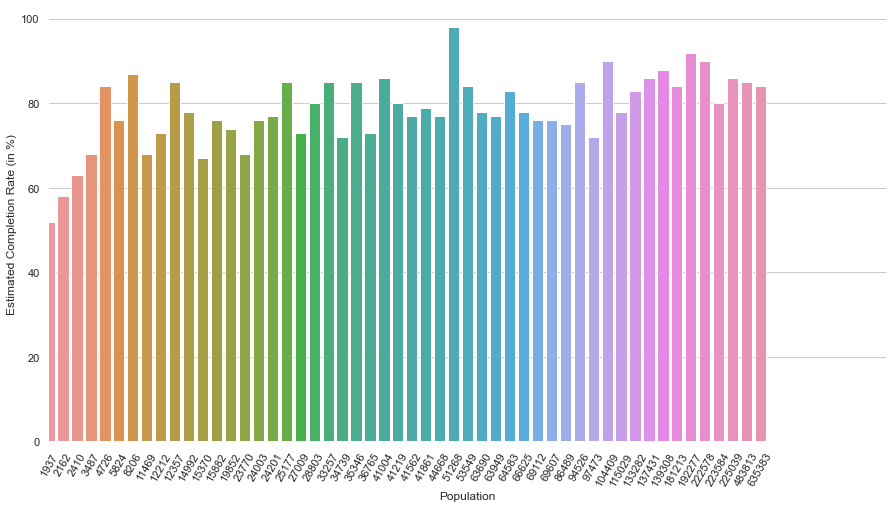

In [173]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(data=cleanData, x="Population", y = "Estimated Completion Rate")
ax.set(xlim=(0, 60), ylabel="Estimated Completion Rate (in %)",
       xlabel="Population")
sns.despine(left=True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

Figure 3: This graph is similar to Figure 2; however, the x and y variables are switched. I like this visualization more because it shows the estimated completion rate from 0 and it is easier to compare school districts based on population since the data is ordered from smallest population to largest population on the x-axis. This graph shows a slight average increase in estimated completion rate as population increases; however, this graph also shows a lot of variety within the estimated completion rates of 60% to 80% as population increases. 

### Figure 4:

<AxesSubplot:xlabel='Estimated Completion Rate', ylabel='Population'>

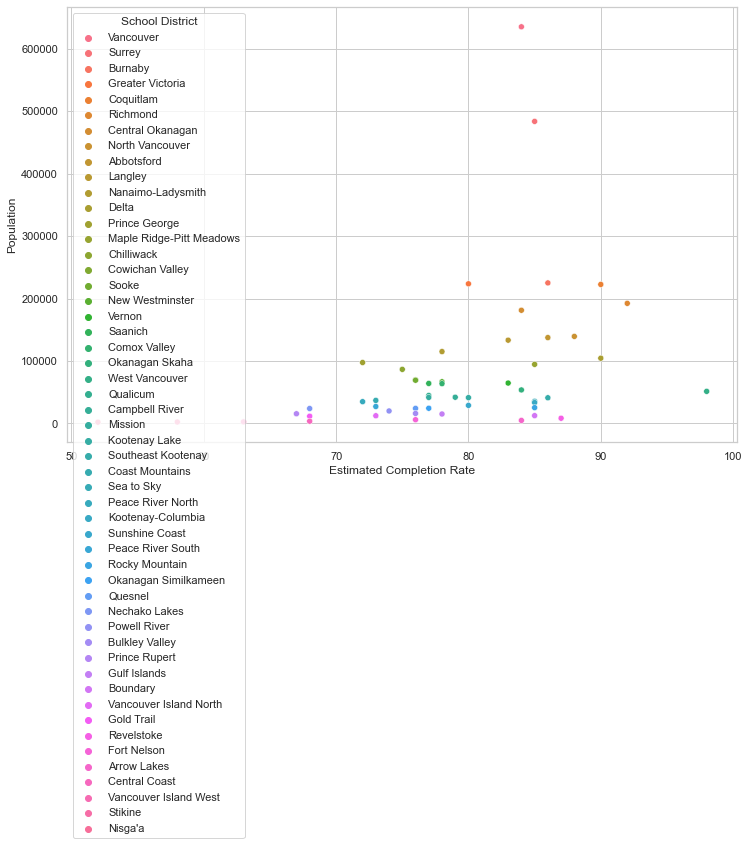

In [174]:
plt.figure(figsize = (12,8))
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'Estimated Completion Rate', y = 'Population', hue = 'School District', data = cleanData)

Figure 4: This graph plots a point for each school district's population (y-axis) and corresponding completion rate (x-axis). It is useful to have the legend indicating all of the school districts. From this graph, I can see that on average as population increases, estimated completion rates also increase with the exception of some outliers.  

### Figure 4: 

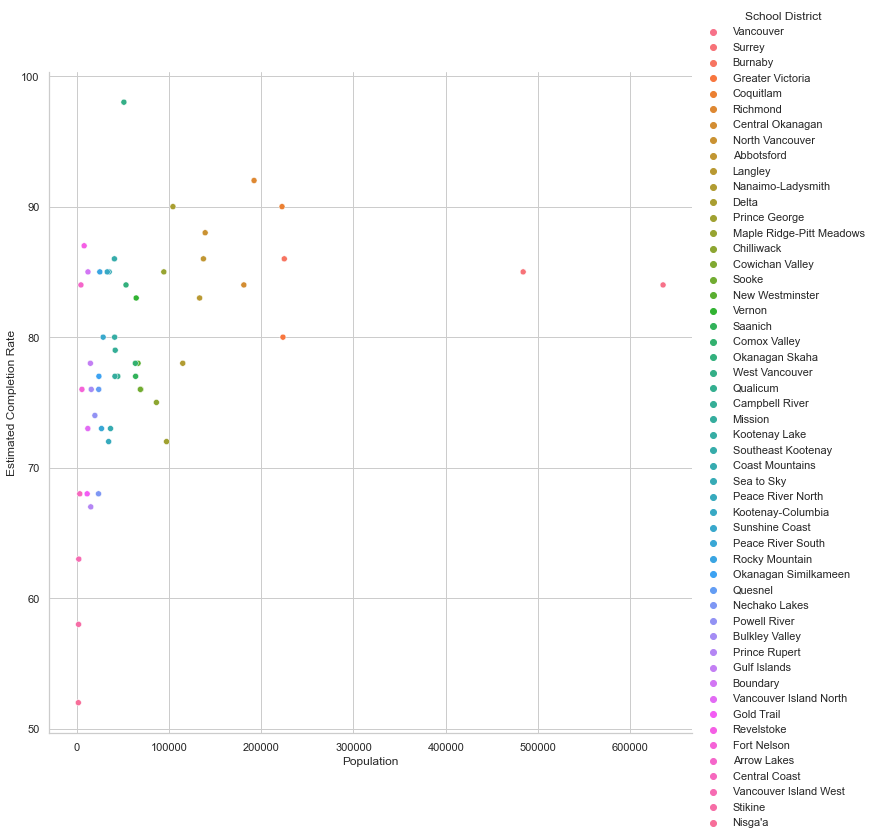

In [175]:
sns.set_theme(style="whitegrid")
sns.relplot(x="Population", y="Estimated Completion Rate", hue="School District", 
            sizes=(40, 400), alpha=1,height=10, data=cleanData)


Figure 4: This graph is similar to the previous one, except the x and y variables are switched. This graph plots a point for each school district's population (x-axis) and corresponding completion rate (y-axis). It is useful to have the legend indicating all of the school districts. From this graph, I can see that on average as population increases, estimated completion rates also increase with the exception of some outliers. I like this visualization more than the previous one because the legend is out of the way and I think it is easier to read when population is on the x-axis. 

### Task 3. Method Chaining and writing Python programs

In [176]:
import project_function2 as funk

clean_df = funk.load_and_process("../data/raw/Completion_Rate_residents_only_97-21.csv")
clean_df

,Year,School District,Estimated Completion Rate
40925,2014,Abbotsford,77.274
17045,2005,Abbotsford,93.92
17046,2005,Abbotsford,99.72
32134,2011,Abbotsford,100
32135,2011,Abbotsford,99.44
...,...,...,...
19299,2006,West Vancouver,100
19296,2006,West Vancouver,100
18985,2006,West Vancouver,98.466
18984,2006,West Vancouver,99.088


### Task 4. Conduct your analysis to help answer your research question(s)

In [177]:
cleanData.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Completion Rate,52.0,78.653846,8.464191,52.0,74.75,78.0,85.00,98.0
Population,52.0,80932.442308,115004.327748,1937.0,18859.50,41390.5,95262.75,635383.0


This sums up the most important features of my two quantitative columns of data. 

It is interesting to note that the min Estimated Completion Rate is 53% and the max is almost 99%. This is a large range. The mean rate is 79%. 

Population also has a very large range with the min at 1,938 and the max at 635,383. The mean population is 80,933. 

### Figure 1:

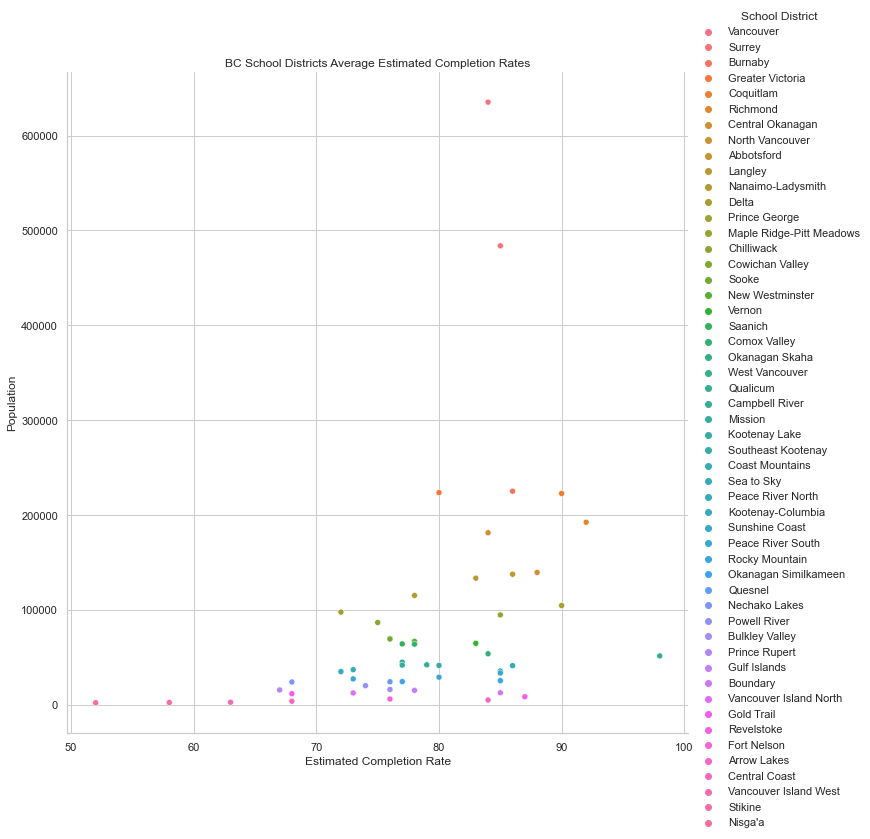

In [178]:
sns.set_theme(style="whitegrid")
sns.relplot(x="Estimated Completion Rate", y="Population", hue="School District", 
            sizes=(40, 400), alpha=1,height=10, data=cleanData).set(title = "BC School Districts Average Estimated Completion Rates")

Figure 1: As population increases, there are some increased completion rates among school districts. However, it is important to note that this is not always the case, as seen in the figure. There are some school districts with very low population relative to the mean that have a high average completion rate, for example, Arrow Lakes has a population of 4,726 and an average estimated completion rate of 84%. 

It is also interesting to note the large range of population size among the districts and the outliers with very large populations relative to the rest of the data may impact this analysis. 

In [179]:
cleanData2 = cleanData.iloc[2:]
cleanData2

,Estimated Completion Rate,Population
School District,,
Burnaby,86,225039
Greater Victoria,80,223584
Coquitlam,90,222578
Richmond,92,192277
Central Okanagan,84,181213
North Vancouver,88,139308
Abbotsford,86,137431
Langley,83,133282
Nanaimo-Ladysmith,78,115029


In [180]:
cleanData2.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Completion Rate,50.0,78.42,8.550188,52.0,74.25,78.0,85.0,98.0
Population,50.0,61785.82,61688.477318,1937.0,16874.50,41111.5,82268.5,225039.0


I have removed the two largest school districts because their populations are much larger than all of the other school districts. Removing these outliers may provide for a better visualization and analysis. This impacts the mean Population quite a bit, lowering it from 80,932 to 61,785. 

### Figure 2: 

<Figure size 864x576 with 0 Axes>

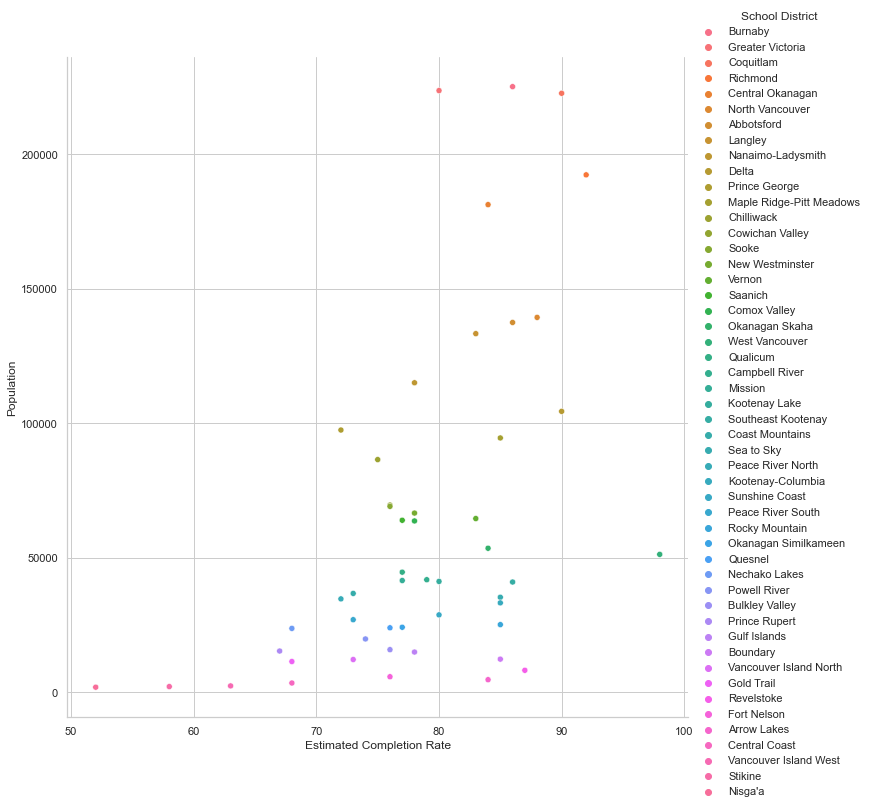

In [ ]:
plt.figure(figsize = (12,8))
sns.set_theme(style="whitegrid")
sns.relplot(x="Estimated Completion Rate", y="Population", hue="School District", 
            sizes=(40, 400), alpha=1,height=10, data=cleanData2)

Figure 2: Vancouver and Surrey's populations are much higher than the remainder of the school districts', so by removing these outliers, it is easier to visualize the other school districts. 

As population increases, there are some increased completion rates among school districts. However, it is important to note that this is not always the case, as seen in the figure.

It is interesting to note that only school districts with a population below 50,000 have an estimated completion rate lower than 70%. 

On the other end of the spectrum, West Vancouver's estimated completion rate is the highest at 98%, but its population is approximately 10,000 lower than the average. 

## Conclusion

As seen in the figures, there is no definitive relationship between an increase in population and an increase in completion rates. Most of the school districts have average estimated completions rates between 70% and 90% regardless of their population size. However, the only school districts with average estimated completion rates lower than 70% also have a population size below 50,000. 